In [1]:
import pandas as pd
import os
import pickle
from sklearn.metrics import accuracy_score

In [2]:
os.listdir('data/')

['cleaned_news_dataset.csv',
 'news_dataset_v1.csv',
 'news_dataset_v3_FE.csv',
 'stop_words.pickle',
 'test.pickle',
 'test_y.pickle',
 'theasianage.csv',
 'theguardian.csv',
 'thehindu.csv',
 'themint.csv',
 'train.pickle',
 'train_x_text.pickle',
 'train_y.pickle',
 'train_y_text.pickle',
 'val_x_text.pickle',
 'val_y_text.pickle']

In [3]:
path_pickles = "Models/"

list_pickles = [
    "df_models_lrc.pickle",
    "df_models_rfc.pickle",
    "df_models_svc.pickle"
]

df_summary = pd.DataFrame()

for pickle_ in list_pickles:
    
    path = path_pickles + pickle_
    
    with open(path, 'rb') as data:
        df = pickle.load(data)

    df_summary = df_summary.append(df)

df_summary = df_summary.reset_index().drop('index', axis=1)

In [4]:
df_summary

,Model,Training Set Accuracy,Test Set Accuracy
0,Logistic Regression,98.0962,94.6108
1,Random Forest,100.0,92.51
2,SVM,100,89.8204


##  Here is am selecting RandomForest

In [5]:
model= pd.read_pickle('Models/best_rfc.pickle')
tf= pd.read_pickle('Models/tfidf.pickle')

In [6]:
val_x_text= pd.read_pickle('data3/val_x_text.pickle')
val_y= pd.read_pickle('data3/val_y_text.pickle')

In [7]:
val_x= tf.transform(val_x_text).todense()
# val_y= tf.transform(val_y_text).todense()

In [8]:
answer= model.predict(val_x)

In [9]:
accuracy_score(val_y,answer)

0.9251497005988024

In [10]:
df= pd.DataFrame({'News':val_x_text,'prediction':answer,'real':val_y['category']})

In [11]:
probablity= model.predict_proba(val_x)
df['correctness_prob']= [probablity[i].max() for i in range( len(val_y))]

In [12]:
error_df= df[df['prediction'] != df['real']]

In [13]:
print('Lowest Probablity :',error_df['correctness_prob'].min())
print('Highest Probablity :',error_df['correctness_prob'].max())

Lowest Probablity : 0.27905342658260485
Highest Probablity : 0.5942641755357441


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


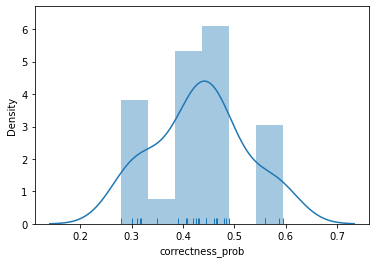

In [14]:
import seaborn as sns
sns.distplot(error_df['correctness_prob'],rug=True)

##  I will keep a threshhold of 0.6 probablity ( real and predicted), any article having less confidence than 0.6  will be treated as miscellaneous article( which will be a article not fitting in any of the mentioned categories